Monitoring COVID-19 Infections through Wastewater Surveillance
CMPSC 190DD/197A Project, Fall 2020
Nick Bachelder, Anton de la Fuente, Zoe Holzer 

PART A: 
1. Using the model dynamics described in the previous section, and all the given and chosen parameters, simulate the behavior of the disease for 120 days for this single leaf node.

In [1]:
import numpy as np
part1 = np.load("part1a.npz")
part1.files
Ic_0 = part1["Ic_0"]
N = part1["N"]
gamma = part1["gamma"]
Lc = part1["Lc"]
Svc_0 = part1["Svc_0_pmf"]

In [2]:
import pandas as pd
S_0 = N-(Ic_0.sum())
I_0 = Ic_0.sum()
R_0 = 0
data = pd.DataFrame(Svc_0)

In [3]:
import random 
from random import Random
random.seed(a=None, version=2)
B0c = []
B1c = []
B2c = []
B3c = []
for i in range(4):
    B0c.append(random.uniform(0, 0.25))
    B1c.append(random.uniform(0.25, 0.5))
    B2c.append(random.uniform(0.5, 0.75))
    B3c.append(random.uniform(0.75, 1.0))
    Bvc = np.array([B0c, B1c, B2c, B3c])
for i in range(4):
    Bvc[i].sort()
Bvc = pd.DataFrame(Bvc)

In [21]:
def S_rate(Svc, Ic, N, Bvc, gamma):
    """Calculate the rate of change of suceptible group split by vulnerability and comorbidity, return a
    tuple where the first element is split on both categories, and the second element only split by comorbidity"""
    #This makes sure that once population hits 0 it doesn't affect the differential
    Svc[Svc < 0] = 0
    dSvcdt = ((Bvc * Svc * Ic)*-1)/N
    return dSvcdt

In [71]:
def I_rate(dSvcdt, Ic, gamma):
    """This function takes in the rate of change of S, sums along the vulnerability axis, and subtracts 
    Ic*gamma"""
    Ic[Ic < 0]= 0
    dIcdt = -dSvcdt.sum() - gamma*Ic
    return dIcdt

In [72]:
def R_rate(Ic, gamma):
    Ic[Ic < 0]= 0
    dRdt = gamma * Ic.sum()
    return dRdt

In [31]:
def SIR_rates(Svc, Ic, N, Bvc, gamma):
    dSvcdt = S_rate(Svc, Ic, N, Bvc, gamma)
    dIcdt = I_rate(dSvcdt, Ic, gamma)
    dRdt = R_rate(Ic, gamma)
    return dSvcdt, dIcdt, dRdt

In [24]:
def L_rate(Ic, Lc, N):
    Lrate= (Ic*Lc).sum()
    return Lrate

In [33]:
def simulation(t, Svc, Ic, N, Bvc, gamma, Lc, I_0):
    I = I_0
    R = 0
    S = Svc.sum().sum()
    SvcOverTime=[]
    IcOvertime=[]
    LOverTime=[]
    simulation = [[S, I, R]]
    for i in range(t):
        rates = SIR_rates(Svc, Ic, N, Bvc, gamma)
        Lrate= L_rate(Ic, Lc, N)
        Svc = Svc + rates[0]
        S = Svc.sum().sum()
        Ic = Ic + rates[1]
        I = Ic.sum()
        R = R + rates[2]
        L=Lrate.sum()
        simulation.append([S, I, R])
        SvcOverTime.insert(i,Svc)
        IcOvertime.insert(i,Ic)
        LOverTime.insert(i,L)
    results = pd.DataFrame(simulation, columns = ["S", "I", "R"])
    return results, SvcOverTime, IcOvertime, LOverTime

In [10]:
#The Svc data multiplied by the population to get raw population values split in both dimensions
t=120
Svc = pd.DataFrame(Svc_0) * (N - I_0)
Ic = Ic_0
sim = simulation(t, Svc, Ic, N, Bvc, gamma, Lc,I_0)

2. Plot Sv,c and Ic values over time. (You can plot all Sv,c on the same plot. Same for Ic.). Also plot the overall S, I, R and L values.

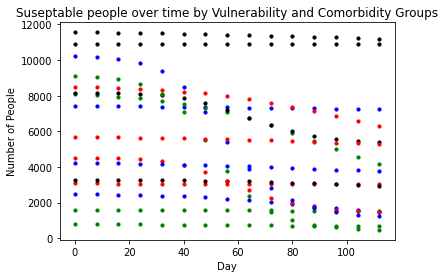

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(sharex=True)
for a in range(0,120,8):
    for b in range(0,4):
        ax.scatter(a,sim[1][a][b][0],c='black',s=10)
        ax.scatter(a,sim[1][a][b][1],c='red',s=10)
        ax.scatter(a,sim[1][a][b][2],c='blue',s=10)
        ax.scatter(a,sim[1][a][b][3],c='green',s=10)
plt.title('Suseptible people over time by Vulnerability and Comorbidity Groups')
plt.ylabel('Number of People')
plt.xlabel('Day')
plt.show()

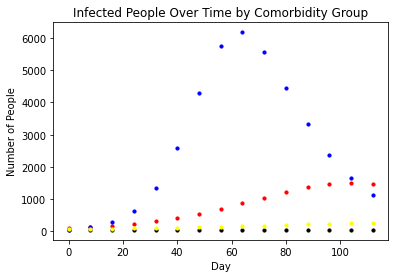

In [12]:
fig,ax=plt.subplots(sharex=True)
for a in range(0,120,8):
    ax.scatter(a,sim[2][a][0],c='black',s=10)
    ax.scatter(a,sim[2][a][1],c='red',s=10)
    ax.scatter(a,sim[2][a][2],c='blue',s=10)
    ax.scatter(a,sim[2][a][3],c='yellow',s=10) 
plt.title('Infected People Over Time by Comorbidity Group')
plt.ylabel('Number of People')
plt.xlabel('Day')
plt.show()

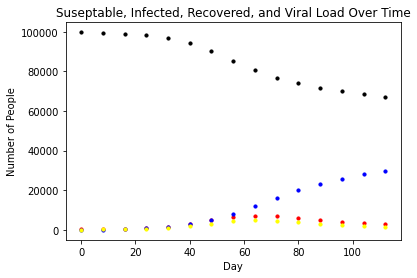

In [13]:
fig,ax=plt.subplots(sharex=True)
SIR=np.array(sim[0])
for a in range(0,120,8):
    ax.scatter(a,SIR[a][0],c='black',s=10)
    ax.scatter(a,SIR[a][1],c='red',s=10)
    ax.scatter(a,SIR[a][2],c='blue',s=10)
    ax.scatter(a,sim[3][a],c='yellow',s=10)
plt.title('Suseptible, Infected, Recovered, and Viral Load Over Time')
plt.ylabel('Number of People')
plt.xlabel('Day')
plt.show()

**3. Do the shapes of S, I, R look similar to what you expected? Which of these plots is the “curve” people refer to when they say “flatten the curve”?**

The shapes of the model look about right except that we were not expecting the huge difference in scale between S and I or R after 120 days. The overall shape however is what we expected based off of what we learned in class and off of over COVID models currently available. Moreover, it is clear that the comorbidity groups largely impact the infected population over time, which makes perfect sense. When people say 'flatten the curve,' they are refering to the infected population curve (in blue on the last plot).

**4. Do you observe that some Sv,c compartments converged to zero while others converged to a positive value? Why do you think that is?**

Yes, we did observe some compartments converging to positive values other then zero. We believe that is because specific βv,c values have a large affect on the overall model, especially because it is the reciprocal of the typical time until an infected person recovers, making it play a large part on the time series.

In [14]:
## Print the percentages of population that never got infected for all compartments (i.e. all values
## of v and c)

OriginalSvcPopulations = pd.DataFrame(Svc_0) * (N - I_0)
SvcFinalDay = sim[1][119]
PercentNotInfectedvc = SvcFinalDay / OriginalSvcPopulations
PercentNotInfectedvc

,0,1,2,3
0,0.995425,0.885317,0.653172,0.963415
1,0.981180,0.715957,0.313226,0.916164
2,0.970388,0.547652,0.114476,0.870937
3,0.957746,0.474345,0.048078,0.828264


In [15]:
## Redo but multiply all Beta values by 1/4. How does this change plots?

BvcRedo = Bvc * (1/4)

Svc = pd.DataFrame(Svc_0) * (N - I_0)
Ic = Ic_0
I = I_0
S = Svc.sum().sum()
R = 0
simRedo = simulation(t, Svc, Ic, N, BvcRedo, gamma, Lc,I_0)

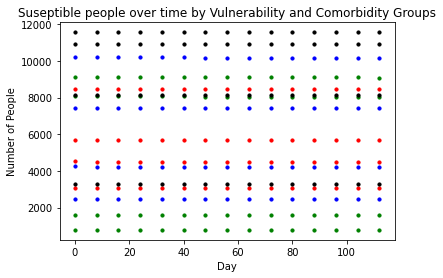

In [16]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(sharex=True)
for a in range(0,120,8):
    for b in range(0,4):
        ax.scatter(a,simRedo[1][a][b][0],c='black',s=10)
        ax.scatter(a,simRedo[1][a][b][1],c='red',s=10)
        ax.scatter(a,simRedo[1][a][b][2],c='blue',s=10)
        ax.scatter(a,simRedo[1][a][b][3],c='green',s=10)
plt.title('Suseptible people over time by Vulnerability and Comorbidity Groups')
plt.ylabel('Number of People')
plt.xlabel('Day')

plt.show()

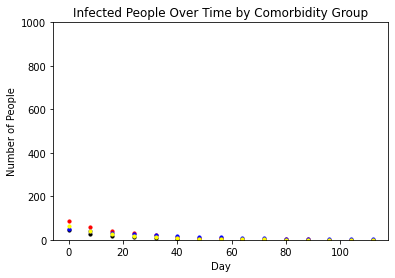

In [17]:
fig,ax=plt.subplots(sharex=True)
for a in range(0,120,8):
    ax.scatter(a,simRedo[2][a][0],c='black',s=10)
    ax.scatter(a,simRedo[2][a][1],c='red',s=10)
    ax.scatter(a,simRedo[2][a][2],c='blue',s=10)
    ax.scatter(a,simRedo[2][a][3],c='yellow',s=10) 
plt.ylim(0, 1000)

plt.title('Infected People Over Time by Comorbidity Group')
plt.ylabel('Number of People')
plt.xlabel('Day')

plt.show()

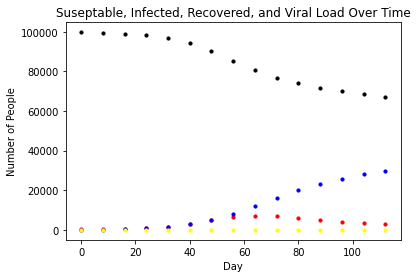

In [18]:
fig,ax=plt.subplots(sharex=True)
SIRRedo=simRedo[0]
for a in range(0,120,8):
    ax.scatter(a,SIR[a][0],c='black',s=10)
    ax.scatter(a,SIR[a][1],c='red',s=10)
    ax.scatter(a,SIR[a][2],c='blue',s=10)
    ax.scatter(a,simRedo[3][a],c='yellow',s=10)
    
plt.title('Suseptible, Infected, Recovered, and Viral Load Over Time')
plt.ylabel('Number of People')
plt.xlabel('Day')
plt.show()

What happened to the S, I, R plots? Did the “curve” flatten compared to the previous case?

The plots changed drastically dy reducing the beta rate. Since the disease was being spread at a much slower rate, all v,c groups declined in cases over time, and the curve most definetly 'flattened.'

In [19]:
## Print the percentages of population that never got infected withthese βv,c values.

OriginalSvcPopulations = pd.DataFrame(Svc_0) * (N - I_0)
SvcFinalDay = simRedo[1][119]
PercentNotInfectedvcRedo = SvcFinalDay / OriginalSvcPopulations

In [20]:
PercentNotInfectedvc ## Many less people in each group were infected at a lower beta value

,0,1,2,3
0,0.995425,0.885317,0.653172,0.963415
1,0.981180,0.715957,0.313226,0.916164
2,0.970388,0.547652,0.114476,0.870937
3,0.957746,0.474345,0.048078,0.828264


# Part b


(b): Now suppose we don’t know the model parameters βv,c and we are trying to estimate them from
observed data—as would happen in the real world. To make the estimation of parameters easier, from
all the leaf nodes the ones with uniform single social vulnerability are picked. So you are given 5
leaf nodes each for the four different values of social vulnerability in the part1b.npy file. The PMF (0)
of susceptible population Sv,c in each comorbidity compartment areas follows:

    5 Leaf nodes with vulnerability = 0.2: PMF of comoborbidity: (0.5, 0.3, 0.1, 0.1) for all nodes. 
    5 Leaf nodes with vulnerability = 0.4: PMF of comoborbidity: (0.4, 0.3, 0.2, 0.1) for all nodes. 
    5 Leaf nodes with vulnerability = 0.6: PMF of comoborbidity: (0.3, 0.3, 0.3, 0.2) for all nodes. 
    5 Leaf nodes with vulnerability = 0.8: PMF of comoborbidity: (0.1, 0.2, 0.3, 0.4) for all nodes.
1. Using these distributions, total population sizes and observations of viral load densities L for 20 consecutive days (day 0 through day 19) for the 20 leaf nodes that are given to you, estimate the 16 parameters βv,c using grid search and MMSE on the “validation” data. In other words try to minimize MSE between Lvalidation and Lestimated. Compare the βv,c you estimated with the ground truth given in the file. This step is to make sure your code and logic works correctly.

In [310]:
import numpy as np
part2 = np.load("part1b.npz")
part2.files
Ic_0 = part2["Ic_0"]
N = part2["N"]
gamma = part2["gamma"]
Lc = part2["Lc"]
L_validation = part2["L_validation"]
L_test = part2["L_test"]
betas_validation = part2["betas_validation"]
pmfs = [[0.5, 0.3, 0.1, 0.1],[0.4, 0.3, 0.2, 0.1],[0.3,0.3,0.2,0.2],[0.1, 0.2, 0.3, 0.4]]
SVC0 = []
for item in pmfs:
    for i in range(5):
        SVC0.append(item)
Svc = (SVC0 * N) - Ic_0
I_0 = Ic_0.sum()
R = 0

We found it necessary to redefine our RHS functions so that we could implement this part of the project

In [22]:
def S_rate(S, I, N, beta, gamma):
    """Calculate the rate of change of suceptible group split by vulnerability and comorbidity, return a
    tuple where the first element is split on both categories, and the second element only split by comorbidity"""
    #This makes sure that once population hits 0 it doesn't affect the differential
    dSvcdt = ((beta * S * I)*-1)/N
    return dSvcdt

In [6]:
def I_rate(dSvcdt, I, gamma):
    """This function takes in the rate of change of S, sums along the vulnerability axis, and subtracts 
    Ic*gamma"""
    dIcdt = -dSvcdt.sum() - gamma*I
    return dIcdt

In [7]:
def R_rate(I, gamma):
    dRdt = gamma * Ic.sum()
    return dRdt

In [15]:
def L_rate(Ic, Lc, N):
    Lrate= (Ic*Lc).sum()
    return dLdt

In [286]:
def SIR_model(t, Y_array, beta, gamma, N):
    S0, S1, S2, S3, I0, I1, I2, I3, R = Y_array
    beta0, beta1, beta2, beta3 = beta
    dS0dt = - S0 * I0 * beta0 / N
    dS1dt = - S1 * I1 * beta1 / N
    dS2dt = - S2 * I2 * beta2 / N
    dS3dt = - S3 * I3 * beta3 / N
    dI0dt = - dS0dt - gamma*I0
    dI1dt = - dS1dt - gamma*I1
    dI2dt = - dS2dt - gamma*I2
    dI3dt = - dS3dt - gamma*I3
    dRdt = gamma*I.sum()
    return [dS0dt, dS1dt, dS2dt, dS3dt, dI0dt, dI1dt, dI2dt, dI3dt, dRdt]

The following is essentially our pipeline for the gridsearch. We include a function that updates MMSE by checking the MSE of a prediction and comparing it to the current lowest MSE, a function that computes our L predictions, and finally a function that implements a gridsearch over all combinations of 4 beta values in our grid, which includes 21 values between 0 and 1. This last function solves one system of differential equations for each comorbidity group at each node and returns the four tuples with the betas that have the least squared error for that node and the squared error.

In [351]:
def update_mmse(beta_value, L_pred, true_L, previous_pair):
    """Function takes in new beta, L_prediction and picks between
    the new beta value and the existing one by comparing the associated
    mse."""
    mse = mean_squared_error(L_pred, true_L)
    #the argument previous_pair is a tuple of the form (mmse, beta)
    if mse < previous_pair[0]:
        mmse = mse
        optimal_beta = beta_value
        return mmse, optimal_beta
    else:
        return previous_pair
    
def predict_L(I_over_time, Lc):
    """computes the L values from the ivp_solution object for I_over_time"""
    L_over_time = np.matmul(Lc, I_over_time)
    return L_over_time

#Is this better done for every node or for a single node?
def searchfor_node_group(t, S, I, R, beta_grid, gamma, L_true, Lc, node_slice):
    """Function performs gridsearch on a set of betas for a node,
    returns a list of four optimal betas, one for each comorbidity
    group.
    Assumptions
    ------------------
    Search a single node at a time, L_val_node is one node of L_validation
    """
    #loop over grid
    beta0 = (np.inf, np.nan)
    beta1 = (np.inf, np.nan)
    beta2 = (np.inf, np.nan)
    beta3 = (np.inf, np.nan)
    for i in range(node_slice[0], node_slice[1]):
        mmse=np.inf
        L_val = L_true[i]
        S = Svc[i]
        I = Ic_0[i]
        R = 0
        for beta_0, beta_1, beta_2, beta_3 in combinations(beta_grid, 4):
            beta = [beta_0, beta_1, beta_2, beta_3]
            #solve ivp
            initial_conditions=np.array([S[0], S[1], S[2], S[3], I[0], I[1], I[2], I[3], R])
            soln = solve_ivp(SIR_model, (t[0], t[-1]), initial_conditions, t_eval=t,\
                           args=(beta, gamma, N),vectorized=True)
            I_over_time = soln.y[5:9]
            beta0 = update_mmse(beta[0], predict_L(I_over_time, Lc),  L_val, beta0)
            beta1 = update_mmse(beta[1], predict_L(I_over_time, Lc),  L_val, beta1)
            beta2 = update_mmse(beta[2], predict_L(I_over_time, Lc), L_val, beta2)
            beta3 = update_mmse(beta[3], predict_L(I_over_time, Lc), L_val, beta3)
        
    group_best_betas = [beta0, beta1, beta2, beta3]
    return group_best_betas

Implement gridsearch for each group of 5 nodes and return a dictionary containing each list of optimal betas for that node.

In [356]:
def gridsearch(Svc, Ic_0, R, L_true, Lc, gamma):
    #Now we try to iterate searchfor_node for each node group
    beta_grid = np.linspace(0,1,20)
    t=np.linspace(0,19,20)
    betas_per_node = dict()
    for group in [(0, 5), (5, 10), (10, 15), (15, 20)]:
        node_slice = (group[0], group[1])  
        i = group[0]//5
        betas_per_node['group{}'.format(i)] = searchfor_node_group(t, Svc, Ic_0, R, beta_grid, gamma, L_true, Lc, node_slice)
    return betas_per_node

Run the function for our test set.

In [357]:
beta_model = gridsearch(Svc, Ic_0, R, L_validation, Lc, gamma)
beta_model

{'group0': [(267.47501115200555, 0.5263157894736842),
  (267.47501115200555, 0.5789473684210527),
  (267.47501115200555, 0.894736842105263),
  (267.47501115200555, 0.9473684210526315)],
 'group1': [(171307.41327438937, 0.8421052631578947),
  (171307.41327438937, 0.894736842105263),
  (171307.41327438937, 0.9473684210526315),
  (171307.41327438937, 1.0)],
 'group2': [(104498478.3542287, 0.21052631578947367),
  (104498478.3542287, 0.894736842105263),
  (104498478.3542287, 0.9473684210526315),
  (104498478.3542287, 1.0)],
 'group3': [(147574858.71957296, 0.6842105263157894),
  (147574858.71957296, 0.894736842105263),
  (147574858.71957296, 0.9473684210526315),
  (147574858.71957296, 1.0)]}

In [122]:
betas_validation

array([[0.1 , 0.15, 0.2 , 0.25],
       [0.2 , 0.25, 0.3 , 0.4 ],
       [0.35, 0.45, 0.5 , 0.6 ],
       [0.4 , 0.5 , 0.6 , 0.8 ]])

In [404]:
def validation_test(t, S, I, R, beta_grid, gamma, L_true, Lc, node_slice):
    #loop over grid
    beta0 = (np.inf, np.nan)
    beta1 = (np.inf, np.nan)
    beta2 = (np.inf, np.nan)
    beta3 = (np.inf, np.nan)
    beta_errors = []
    for beta in beta_grid:
        beta = [beta_0, beta_1, beta_2, beta_3]
        for i in range(node_slice[0], node_slice[1]):
            mmse=np.inf
            L_val = L_true[i]
            S = Svc[i]
            I = Ic_0[i]
            R = 0
            #solve ivp
            initial_conditions=np.array([S[0], S[1], S[2], S[3], I[0], I[1], I[2], I[3], R])
            soln = solve_ivp(SIR_model, (t[0], t[-1]), initial_conditions, t_eval=t,\
                           args=(beta, gamma, N),vectorized=True)
            I_over_time = soln.y[5:9]
            beta0 = update_mmse(beta[0], predict_L(I_over_time, Lc),  L_val, beta0)
            beta1 = update_mmse(beta[1], predict_L(I_over_time, Lc),  L_val, beta1)
            beta2 = update_mmse(beta[2], predict_L(I_over_time, Lc), L_val, beta2)
            beta3 = update_mmse(beta[3], predict_L(I_over_time, Lc), L_val, beta3)
        beta_errors = [beta0, beta1, beta2, beta3]
    return beta_errors
def validation(Svc, Ic_0, R, L_true, Lc, gamma):
    #Now we try to iterate searchfor_node for each node group
    beta_grid = betas_validation
    t=np.linspace(0,19,20)
    beta_error = []
    for group in [(0, 5), (5, 10), (10, 15), (15, 20)]:
        node_slice = (group[0], group[1])  
        i = group[0]//5
        beta_error.append(validation_test(t, Svc, Ic_0, R, beta_grid, gamma, L_true, Lc, node_slice))
    return np.array([beta_error])
validation(Svc, Ic_0, R, L_validation, Lc, gamma)

array([[[[1.73989592e+03, 0.00000000e+00],
         [1.73989592e+03, 3.50000000e-01],
         [1.73989592e+03, 9.00000000e-01],
         [1.73989592e+03, 1.00000000e+00]],

        [[2.49090609e+05, 0.00000000e+00],
         [2.49090609e+05, 3.50000000e-01],
         [2.49090609e+05, 9.00000000e-01],
         [2.49090609e+05, 1.00000000e+00]],

        [[1.05881728e+08, 0.00000000e+00],
         [1.05881728e+08, 3.50000000e-01],
         [1.05881728e+08, 9.00000000e-01],
         [1.05881728e+08, 1.00000000e+00]],

        [[1.49247081e+08, 0.00000000e+00],
         [1.49247081e+08, 3.50000000e-01],
         [1.49247081e+08, 9.00000000e-01],
         [1.49247081e+08, 1.00000000e+00]]]])

2) Now use the “test” data (20 L values for 20 days) from the file and estimate the βv,c. This time you won’t have access to the ground truth βv,c values. Print the βv,c values you estimated.

In [358]:
betas = gridsearch(Svc, Ic_0, R, L_test, Lc, gamma)
betas

{'group0': [(413.7059974521714, 0.05263157894736842),
  (413.7059974521714, 0.10526315789473684),
  (413.7059974521714, 0.3684210526315789),
  (413.7059974521714, 0.47368421052631576)],
 'group1': [(173896.34973081294, 0.8421052631578947),
  (173896.34973081294, 0.894736842105263),
  (173896.34973081294, 0.9473684210526315),
  (173896.34973081294, 1.0)],
 'group2': [(111850191.99653926, 0.21052631578947367),
  (111850191.99653926, 0.894736842105263),
  (111850191.99653926, 0.9473684210526315),
  (111850191.99653926, 1.0)],
 'group3': [(183301562.52049905, 0.6842105263157894),
  (183301562.52049905, 0.894736842105263),
  (183301562.52049905, 0.9473684210526315),
  (183301562.52049905, 1.0)]}

In [359]:
final_betas = []
for key in betas.keys():
    tuples = betas[key]
    group_betas = []
    for tup in tuples:
        group_betas.append(tup[1])
    final_betas.append(group_betas)
final_betas = np.array(final_betas)
final_betas

array([[0.05263158, 0.10526316, 0.36842105, 0.47368421],
       [0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.21052632, 0.89473684, 0.94736842, 1.        ],
       [0.68421053, 0.89473684, 0.94736842, 1.        ]])

3. Use the βv,c you found to predict the disease behaviour for the future. Solve the equations for 100 days and plot S, I, R, L values for the first node in each social vulnerability case. On L graphs, also plot the corresponding observed values for the first 20 days (with a circle marker).

In [360]:
import pandas as pd
solutions = dict()
t = np.linspace(1,100,100)
solutions = pd.DataFrame()
for i, k in [(0, 0), (5, 1), (10,2), (15,3)]:
    S = Svc[i]
    I = Ic_0[i]
    R = 0
    beta = final_betas[k]
    initial_conditions = np.array([S[0], S[1], S[2], S[3], I[0], I[1], I[2], I[3], R])
    sol = solve_ivp(SIR_model,(t[0], t[-1]),initial_conditions,t_eval=t, args=(beta, gamma, N), vectorized = True)
    for j in range(4):
        solutions['group{}_com{}_S'.format(k, j)] = sol.y[j]
        solutions['group{}_com{}_I'.format(k, j)] = sol.y[j+4]
        solutions['group{}_com{}_R'.format(k, j)] = sol.y[-1]
solutions

,group0_com0_S,group0_com0_I,group0_com0_R,group0_com1_S,group0_com1_I,group0_com1_R,group0_com2_S,group0_com2_I,group0_com2_R,group0_com3_S,...,group3_com0_R,group3_com1_S,group3_com1_I,group3_com1_R,group3_com2_S,group3_com2_I,group3_com2_R,group3_com3_S,group3_com3_I,group3_com3_R
0,24953.000000,47.000000,0.000000,14910.000000,90.000000,0.000000,4949.000000,51.000000,0.000000,4935.000000,...,0.000000,9966.000000,34.000000,0.000000,14984.000000,16.000000,0.000000,19972.000000,28.000000,0.000000
1,24951.792974,44.924563,18.071429,14907.231016,86.467415,18.071429,4947.172695,49.247402,18.071429,4931.999193,...,7.357143,9959.602617,37.834269,7.357143,14978.939339,19.787223,7.357143,19958.764370,38.867908,7.357143
2,24950.639287,42.940692,36.142857,14904.571187,83.072985,36.142857,4945.408828,47.554394,36.142857,4929.073367,...,14.714286,9952.489051,42.095850,14.714286,14972.684248,24.467725,14.714286,19940.427228,53.922242,14.714286
3,24949.536300,41.043872,54.214286,14902.015822,79.810872,54.214286,4943.706058,45.918873,54.214286,4926.220636,...,22.071429,9944.580832,46.831102,22.071429,14964.954256,30.250963,22.071429,19915.015353,74.780146,22.071429
4,24948.481815,39.230340,72.285714,14899.560866,76.676011,72.285714,4942.062289,44.338940,72.285714,4923.439218,...,29.428571,9935.790998,52.091276,29.428571,14955.401244,37.396697,29.428571,19879.789781,103.683020,29.428571
5,24947.473846,37.496694,90.357143,14897.202574,73.663719,90.357143,4940.475555,42.812811,90.357143,4920.727390,...,36.785714,9926.023582,57.932781,36.785714,14943.599905,46.221864,36.785714,19831.133118,143.578054,36.785714
6,24946.510459,35.839622,108.428571,14894.937301,70.769432,108.428571,4938.943939,41.338739,108.428571,4918.083466,...,44.142857,9915.173271,64.417409,44.142857,14929.036058,57.109783,44.142857,19764.171872,198.455604,44.142857
7,24945.589775,34.255903,126.500000,14892.761498,67.988707,126.500000,4937.465570,39.915020,126.500000,4915.505790,...,51.500000,9903.123953,71.613064,51.500000,14911.067654,70.538427,51.500000,19671.949238,273.989829,51.500000
8,24944.709966,32.742406,144.571429,14890.671717,65.317222,144.571429,4936.038630,38.539993,144.571429,4912.992740,...,58.857143,9889.747233,79.594493,58.857143,14888.893915,87.102298,58.857143,19545.031903,377.804619,58.857143
9,24943.869259,31.296093,162.642857,14888.664606,62.750773,162.642857,4934.661346,37.212036,162.642857,4910.542728,...,66.214286,9874.902413,88.443295,66.214286,14861.555110,107.512575,66.214286,19371.507700,519.475114,66.214286


In [361]:
simulation2 = pd.DataFrame()
for i in range(4):
    simulation2['group{}_S'.format(i)] = solutions[
        ['group{}_com0_S'.format(i), 'group{}_com1_S'.format(i), 'group{}_com2_S'.format(i), 'group{}_com3_S'.format(i)]
    ].sum(axis = 1)
    simulation2['group{}_I'.format(i)] = solutions[
        ['group{}_com0_I'.format(i), 'group{}_com1_I'.format(i), 'group{}_com2_I'.format(i), 'group{}_com3_I'.format(i)]
    ].sum(axis = 1)
    simulation2['group{}_R'.format(i)] = solutions[
        ['group{}_com0_R'.format(i), 'group{}_com1_R'.format(i), 'group{}_com2_R'.format(i), 'group{}_com3_R'.format(i)]
    ].sum(axis = 1)
simulation2

,group0_S,group0_I,group0_R,group1_S,group1_I,group1_R,group2_S,group2_I,group2_R,group3_S,group3_I,group3_R
0,49747.000000,253.000000,0.000000,49845.000000,155.000000,0.000000,49835.000000,165.000000,0.000000,49897.000000,103.000000,0.000000
1,49738.195879,244.054166,72.285714,49805.704534,182.280569,44.285714,49811.019555,176.783893,47.142857,49870.607496,121.405509,29.428571
2,49729.692669,235.434565,144.571429,49758.444806,215.376967,88.571429,49784.320658,190.381350,94.285714,49837.209165,145.317742,58.857143
3,49721.478817,227.127953,216.857143,49701.357333,255.687802,132.857143,49754.486402,206.069569,141.428571,49794.472857,176.609664,88.285714
4,49713.544188,219.122841,289.142857,49632.119242,304.957549,177.142857,49721.033478,224.170080,188.571429,49739.224543,217.833691,117.714286
5,49705.879366,211.408619,361.428571,49547.901723,365.323689,221.428571,49683.422069,245.043744,235.714286,49667.325566,272.310371,147.142857
6,49698.475165,203.974934,433.714286,49445.012061,439.575840,265.714286,49641.003946,269.124738,282.857143,49573.282952,344.475174,176.571429
7,49691.322634,196.811701,506.000000,49318.807307,531.215417,310.000000,49593.013266,296.926418,330.000000,49449.381748,440.548145,206.000000
8,49684.413053,189.909092,578.285714,49163.694285,644.455638,354.285714,49538.566565,329.041318,377.142857,49285.259479,568.822428,235.428571
9,49677.737939,183.257545,650.571429,48973.301443,784.005465,398.571429,49476.662764,366.141151,424.285714,49067.903560,739.665950,264.857143


In [363]:
def L_sim(I_over_time, Lc):
    L_over_time = Lc * I_over_time
    return L_over_time

In [386]:
for i in range(4):
    simulation2['group{}_L'.format(i)] = simulation2['group{}_I'.format(i)].map(lambda x: L_sim(x, Lc.sum()))

In [388]:
simulation2

,group0_S,group0_I,group0_R,group1_S,group1_I,group1_R,group2_S,group2_I,group2_R,group3_S,group3_I,group3_R,group0_L,group1_L,group2_L,group3_L,Days
0,49747.000000,253.000000,0.000000,49845.000000,155.000000,0.000000,49835.000000,165.000000,0.000000,49897.000000,103.000000,0.000000,607.200000,372.000000,396.000000,247.200000,0
1,49738.195879,244.054166,72.285714,49805.704534,182.280569,44.285714,49811.019555,176.783893,47.142857,49870.607496,121.405509,29.428571,585.729998,437.473366,424.281344,291.373223,1
2,49729.692669,235.434565,144.571429,49758.444806,215.376967,88.571429,49784.320658,190.381350,94.285714,49837.209165,145.317742,58.857143,565.042957,516.904722,456.915241,348.762580,2
3,49721.478817,227.127953,216.857143,49701.357333,255.687802,132.857143,49754.486402,206.069569,141.428571,49794.472857,176.609664,88.285714,545.107087,613.650726,494.566967,423.863192,3
4,49713.544188,219.122841,289.142857,49632.119242,304.957549,177.142857,49721.033478,224.170080,188.571429,49739.224543,217.833691,117.714286,525.894819,731.898118,538.008193,522.800858,4
5,49705.879366,211.408619,361.428571,49547.901723,365.323689,221.428571,49683.422069,245.043744,235.714286,49667.325566,272.310371,147.142857,507.380685,876.776854,588.104986,653.544890,5
6,49698.475165,203.974934,433.714286,49445.012061,439.575840,265.714286,49641.003946,269.124738,282.857143,49573.282952,344.475174,176.571429,489.539842,1054.982016,645.899372,826.740417,6
7,49691.322634,196.811701,506.000000,49318.807307,531.215417,310.000000,49593.013266,296.926418,330.000000,49449.381748,440.548145,206.000000,472.348081,1274.917002,712.623403,1057.315548,7
8,49684.413053,189.909092,578.285714,49163.694285,644.455638,354.285714,49538.566565,329.041318,377.142857,49285.259479,568.822428,235.428571,455.781820,1546.693531,789.699163,1365.173827,8
9,49677.737939,183.257545,650.571429,48973.301443,784.005465,398.571429,49476.662764,366.141151,424.285714,49067.903560,739.665950,264.857143,439.818108,1881.613117,878.738762,1775.198279,9


In [392]:
import pandas as pd
import altair as alt
import numpy as np

part2 = np.load("part1b.npz")
L_test = part2["L_test"]

predictions = simulation2

predictions['Days'] = np.arange(0, 100)
predictions_g0 = predictions.iloc[:,[0,1,2,12,16]]
predictions_g1 = predictions.iloc[:,[3,4,5,13,16]]
predictions_g2 = predictions.iloc[:,[6,7,8,14,16]]
predictions_g3 = predictions.iloc[:,[9,10,13,15,16]]
predictions_g0 = predictions_g0.rename(columns = {'group0_S':'S', 'group0_I': 'I', 'group0_R': 'R', 'group0_L': 'L', 'Days':'Days'}).melt(id_vars = 'Days')
predictions_g1 = predictions_g1.rename(columns = {'group1_S':'S', 'group1_I': 'I', 'group1_R': 'R', 'group1_L': 'L', 'Days':'Days'}).melt(id_vars = 'Days')
predictions_g2 = predictions_g2.rename(columns = {'group2_S':'S', 'group2_I': 'I', 'group2_R': 'R', 'group2_L': 'L', 'Days':'Days'}).melt(id_vars = 'Days')
predictions_g3 = predictions_g3.rename(columns = {'group3_S':'S', 'group3_I': 'I', 'group3_R': 'R', 'group3_L': 'L', 'Days':'Days'}).melt(id_vars = 'Days')

L_test_g0 = pd.DataFrame({'Days': np.arange(0, 20), 'L': L_test[0]}).melt(id_vars = 'Days')
L_test_g1 = pd.DataFrame({'Days': np.arange(0, 20), 'L': L_test[5]}).melt(id_vars = 'Days')
L_test_g2 = pd.DataFrame({'Days': np.arange(0, 20), 'L': L_test[10]}).melt(id_vars = 'Days')
L_test_g3 = pd.DataFrame({'Days': np.arange(0, 20), 'L': L_test[15]}).melt(id_vars = 'Days')

In [393]:
chartg0 = alt.Chart(predictions_g0, title = 'Values for Vulnerability Group 0').mark_line().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg0_true = alt.Chart(L_test_g0).mark_point().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg1 = alt.Chart(predictions_g1, title = 'Values for Vulnerability Group 1').mark_line().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg1_true = alt.Chart(L_test_g1).mark_point().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg2 = alt.Chart(predictions_g2, title = 'Values for Vulnerability Group 2').mark_line().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg2_true = alt.Chart(L_test_g2).mark_point().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg3 = alt.Chart(predictions_g3, title = 'Values for Vulnerability Group 3').mark_line().encode(
    x='Days',
    y='value',
    color = 'variable'
)

chartg3_true = alt.Chart(L_test_g3).mark_point().encode(
    x='Days',
    y='value',
    color = 'variable'
)

In [394]:
chartg0 + chartg0_true

alt.LayerChart(...)

In [395]:
chartg1 + chartg1_true

alt.LayerChart(...)

In [396]:
chartg2 + chartg2_true

alt.LayerChart(...)

In [397]:
chartg3 + chartg3_true

alt.LayerChart(...)